In [2]:
from utils import *
from global_vars import *

Loading statemap...
Statemap loaded


In [54]:
stats = {
    1: 0, # In 1 try
    2: 0, # In 2 tries
    3: 0, # In 3 tries
    4: 0, # In 4 tries
    5: 0, # In 5 tries
    6: 0, # In 6 tries
    -1: 0
}

for i, answer in enumerate(ANS_ARR):
    rnd = 1
    avail_words = GUESS_ARR
    won = False
    
    while rnd <= 6 and not won:
        if rnd ==1:
            guess, entropy = 'soare', 5.9 # From previous exp, dont need traverse again
        else:
            guess, entropy = get_guess(avail_words)
        
        state = ''.join(map(str, get_state(guess, answer)))
        avail_words = set(STATE_MAP[guess][state]) & set(avail_words)
        
        if guess == answer:
            won = True
            break
        
        rnd += 1
        
    if won:
        stats[rnd] += 1
    else:
        stats[-1] += 1
        
    print(f"{i+1}/{len(ANS_ARR)} words tested", end='\r')

print(stats)

{1: 0, 2: 22, 3: 898, 4: 1290, 5: 103, 6: 2, -1: 0}


In [6]:
!pip3 install matplotlib

     |████████████████████████████████| 7.3 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 37.0 MB/s eta 0:00:01
  Using cached fonttools-4.29.1-py3-none-any.whl (895 kB)
     |████████████████████████████████| 61 kB 774 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 12.7 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [55]:
with open('./outputs/stats.json', 'w') as f:
    json.dump(stats, f)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

[]

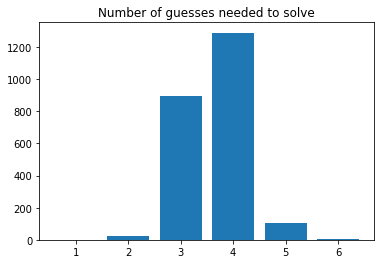

In [51]:
# Number solved by algorithm
stats = json.load(open('./outputs/stats.json'))

x = np.array(list(stats.keys()), dtype='int64')
y = np.array(list(stats.values()), dtype='int64')
plt.bar(x, y)
plt.title("Number of guesses needed to solve")
plt.plot()

In [52]:
total = 0
div = 0

for i in range(len(x)):
    total += x[i] * y[i]
    div += y[i]
    
total / div

3.639308855291577

In [56]:
len(ANS_ARR)

2315